# Data Exploration and Decision tree development with Lime XAI model for Banking dataset 

In [18]:
import csv
import pandas as pd
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
!pip install interpret
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
from interpret.blackbox import LimeTabular
from interpret import show
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree 

## Data Exploration

In [5]:
file_path = "Banking_Dataset.csv"
# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Remove the "Loan_ID" column
banking_dataset = df.drop(columns="Loan_ID")

# Drop rows with missing values
banking_dataset = banking_dataset.dropna()

In [6]:
with open(file_path, mode='r', newline='') as file:
    reader = csv.reader(file)
    column_names = next(reader)
print("Column names:", column_names)
df = pd.read_csv(file_path)
banking_dataset = df.drop(columns="Loan_ID")
print(banking_dataset)

Column names: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']
     Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0      Male      No          0      Graduate            No             5849   
1      Male     Yes          1      Graduate            No             4583   
2      Male     Yes          0      Graduate           Yes             3000   
3      Male     Yes          0  Not Graduate            No             2583   
4      Male      No          0      Graduate            No             6000   
..      ...     ...        ...           ...           ...              ...   
609  Female      No          0      Graduate            No             2900   
610    Male     Yes         3+      Graduate            No             4106   
611    Male     Yes          1      Graduate            No             807

## Data Preprocessing

In [7]:
banking_dataset = pd.get_dummies(banking_dataset, columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'])
banking_dataset['Loan_Status'] = banking_dataset['Loan_Status'].map({'Y': 1, 'N': 0})
X = banking_dataset.drop(columns=['Loan_Status'])
y = banking_dataset['Loan_Status']

## Decision Tree Development

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [9]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6864864864864865


## Decision Tree Visualisation

In [28]:
feature_names = banking_dataset.columns.tolist()
target_names = banking_dataset['Loan_Status'].unique()
feature_names = banking_dataset.columns.tolist()
target_names = banking_dataset['Loan_Status'].unique()
print(feature_names)
print("Target Names:", target_names)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban']
Target Names: [1 0]


In [29]:
feature_names = banking_dataset.columns.tolist()
target_names = banking_dataset['Loan_Status'].unique()

print("Feature Names:", feature_names)
print("Target Names:", target_names)


Feature Names: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban']
Target Names: [1 0]


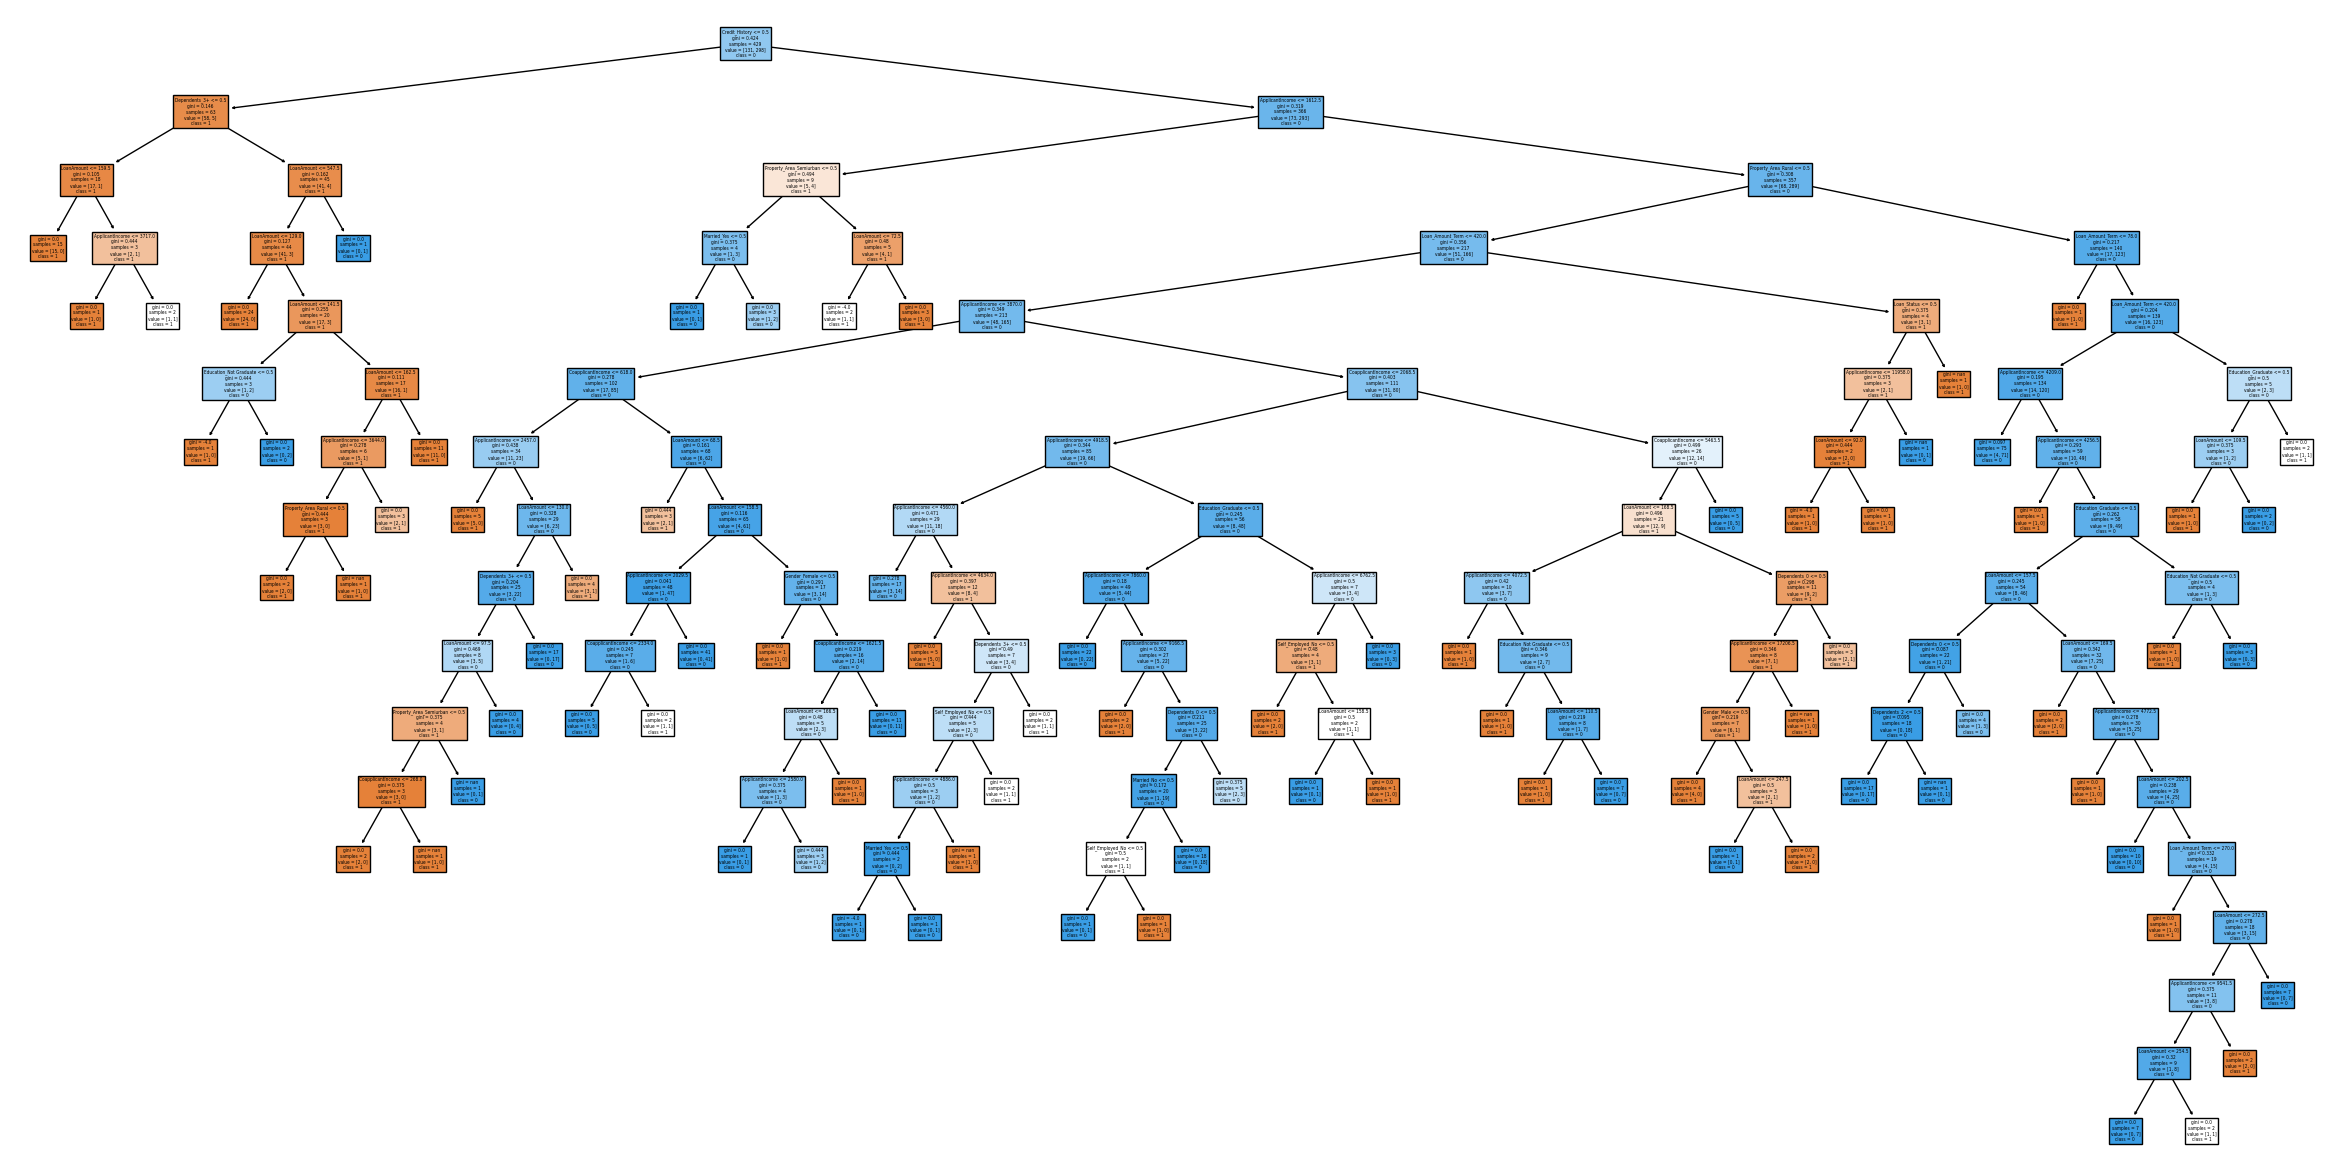

In [19]:
target_names = [str(class_name) for class_name in target_names]
fig = plt.figure(figsize=(30,15))
_ = plot_tree(clf, 
                                feature_names= feature_names,  
                                class_names= target_names,
                                filled=True)

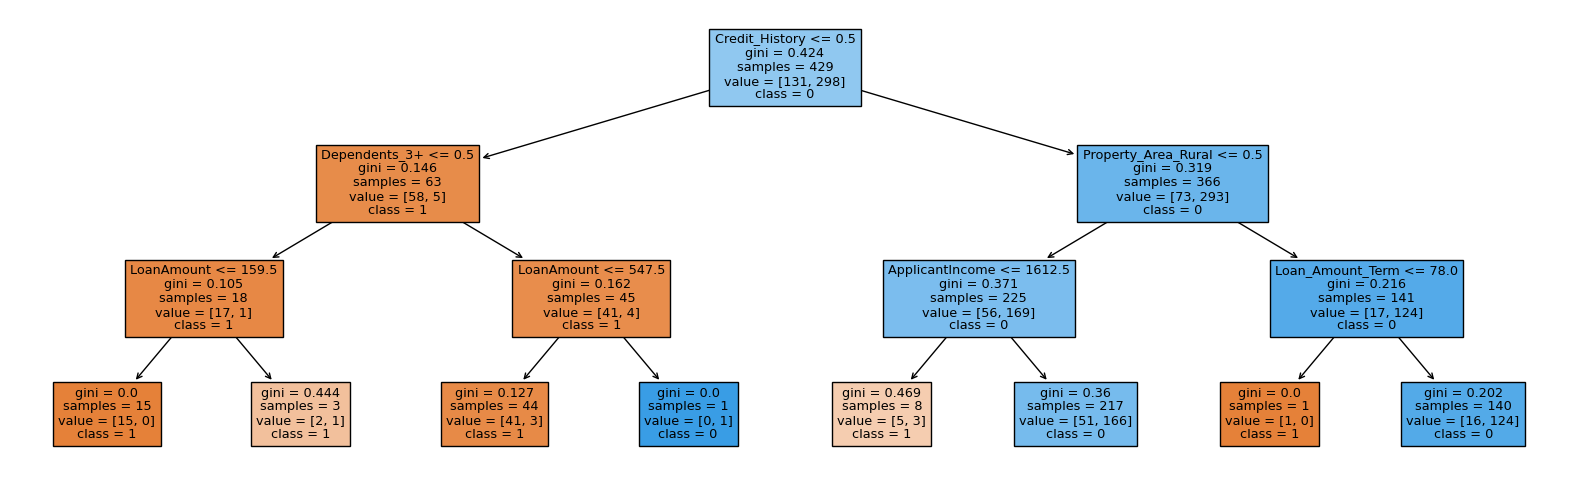

In [20]:
clf_pruned = DecisionTreeClassifier(max_depth=3)
clf_pruned.fit(X_train, y_train)
plt.figure(figsize=(20, 6))
plot_tree(clf_pruned, feature_names=feature_names, class_names=target_names, filled=True)
plt.savefig("pruned_decision_tree.png", dpi=300, bbox_inches='tight')
plt.savefig("pruned_decision_tree.pdf", format="pdf", dpi=300, bbox_inches='tight')
plt.show()